### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import preprocessing

### Read CSV file and obtain the location (Bilbao Magisterio, same as K-means)

In [2]:
# Read CSV file of Datos_EHU_clientes_tabladinamica_anonimo_DATOS
df1_location = pd.read_csv("Datos_EHU_clientes_tabladinamica_anonimo_DATOS.csv")

# Make a copy
df_location = df1_location.copy()

# Extract from CSV file the 'location' = 'BIZ-Bilbao > Ingenieros > Planta 2' to obtain 'ap_name'
# 1st drop unnnecesary data
df_location.drop(labels=["id","ip_address","ip_type","type","vendor","avg_session_throughput","troughput", "interface",
"ap_mac_address","ap_ip_address","ssid","vlan","protocol","status","on_network","association_time","session_length",
"first_seen","traffic","encryption_cipher","rssi","snr","802_11u_client"], axis=1, inplace=True)

# 2nd stay only with data that 'location' = 'BIZ-Leioa > Biblioteca > P0,1,2,3,4,5,6'
df_location = df_location[(df_location["location"] == 'BIZ-Leioa > Biblioteca > P0') |
(df_location["location"] == 'BIZ-Leioa > Biblioteca > P1') |
(df_location["location"] == 'BIZ-Leioa > Biblioteca > P2') |
(df_location["location"] == 'BIZ-Leioa > Biblioteca > P3') |
(df_location["location"] == 'BIZ-Leioa > Biblioteca > P4') |
(df_location["location"] == 'BIZ-Leioa > Biblioteca > P5') |
(df_location["location"] == 'BIZ-Leioa > Biblioteca > P6')]

# Show
df_location

,location,ap_name
43,BIZ-Leioa > Biblioteca > P5,AP-Biblioteca-1142-U014969
57,BIZ-Leioa > Biblioteca > P6,AP-Biblioteca-1142-U017953
90,BIZ-Leioa > Biblioteca > P1,AP-Biblioteca-1602-U022170
139,BIZ-Leioa > Biblioteca > P5,AP-Biblioteca-1602-U022183
155,BIZ-Leioa > Biblioteca > P4,AP-Biblioteca-1602-U022177
...,...,...
69696,BIZ-Leioa > Biblioteca > P0,AP-Biblioteca-1602-U022167
69701,BIZ-Leioa > Biblioteca > P5,AP-Biblioteca-1142-U014953
69716,BIZ-Leioa > Biblioteca > P0,AP-Biblioteca-1602-U022166
69756,BIZ-Leioa > Biblioteca > P1,AP-Biblioteca-1602-U022170


### Obtain with the 'ap_name' the 'suma_troghput' & 'cuenta_de_ip_address' 

In [3]:
# Read CSV file of Datos_EHU_clientes_tabladinamica_anonimo_Hoja10.csv
df1_ap = pd.read_csv("Datos_EHU_clientes_tabladinamica_anonimo_Hoja10.csv")

# Make a copy
df_ap = df1_ap.copy()

# Extract from CSV file the 'etiquetas_de_fila' of the df_location['ap_name']
# 1st save data of df_location['ap_name']
ap_name = df_location['ap_name']

# 2nd stay only the data of the 'ap_name'
df_ap_filter = df_ap[df_ap["etiquetas_de_fila"].isin(ap_name)]

# Show
df_ap_filter

,etiquetas_de_fila,suma_de_troughput,cuenta_de_ip_address
140,AP-Biblioteca-1142-U014953,"5365,1",19.0
141,AP-Biblioteca-1142-U014969,"41254,7",61.0
142,AP-Biblioteca-1142-U016978,"7291,9",58.0
143,AP-Biblioteca-1142-U017953,36526,49.0
144,AP-Biblioteca-1142-U018920,12299,74.0
145,AP-Biblioteca-1262-U018787,"13253,9",62.0
146,AP-Biblioteca-1262-U021951,"12621,9",13.0
147,AP-Biblioteca-1602-U022166,"21796,9",53.0
148,AP-Biblioteca-1602-U022167,"1670,7",18.0
149,AP-Biblioteca-1602-U022168,"3172,4",21.0


### Drop the unnecsary data

In [4]:
df_ap_filter.drop(["etiquetas_de_fila"], axis=1, inplace=True)

# Convert String to float of df_ap_filter['suma_de_troughput'] column
# Replace ',' of the String to be able to convert to Float
df_ap_filter['suma_de_troughput'] = df_ap_filter['suma_de_troughput'].str.replace(',', '.')
df_ap_filter['suma_de_troughput'] = df_ap_filter['suma_de_troughput'].astype(float)


# Show info of dataframe
df_ap_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 140 to 176
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   suma_de_troughput     37 non-null     float64
 1   cuenta_de_ip_address  37 non-null     float64
dtypes: float64(2)
memory usage: 888.0 bytes


C:\Users\alvar\AppData\Local\Temp\ipykernel_26300\2082765383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ap_filter.drop(["etiquetas_de_fila"], axis=1, inplace=True)
C:\Users\alvar\AppData\Local\Temp\ipykernel_26300\2082765383.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ap_filter['suma_de_troughput'] = df_ap_filter['suma_de_troughput'].str.replace(',', '.')
C:\Users\alvar\AppData\Local\Temp\ipykernel_26300\2082765383.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

### DBSCAN
* For random eps value and min_samples value 

C:\Users\alvar\AppData\Local\Temp\ipykernel_26300\1133682607.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ap_filter['Cluster'] = cluster


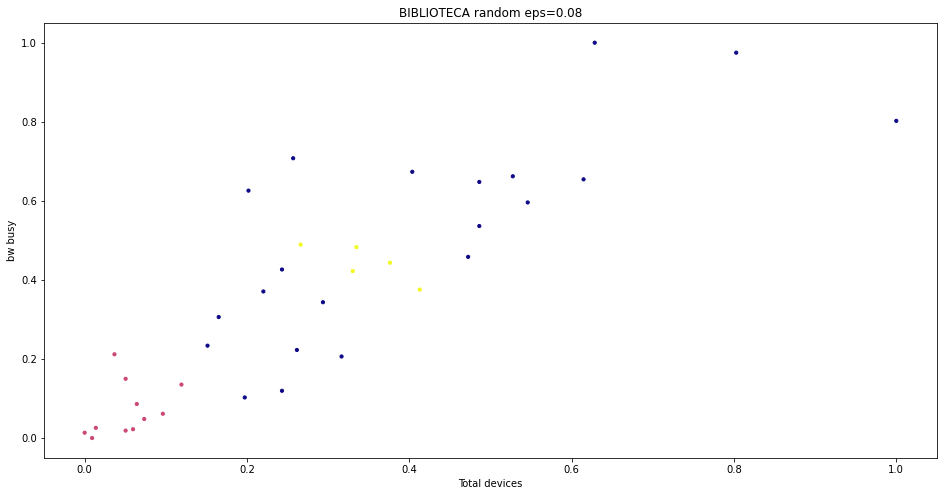

In [5]:
# Normalize
min_max_scaler = preprocessing.MinMaxScaler()
df_escalado = min_max_scaler.fit_transform(df_ap_filter)
df_escalado = pd.DataFrame(df_escalado)
df_escalado = df_escalado.rename(columns= {0 : 'bw_busy', 1: 'total_devices'})

# DBSCAN
dbscan = DBSCAN(eps= 0.08, min_samples= 4)
cluster = dbscan.fit_predict(df_escalado)

# Add to dataFrame
df_ap_filter['Cluster'] = cluster

# Asign x and y
x = df_escalado['total_devices'].values
y = df_escalado['bw_busy'].values 

# Plot the clusters
plt.figure(figsize=(16,8))
plt.title("BIBLIOTECA random eps=0.08")
plt.scatter(x, y, c = cluster, cmap= "plasma", s=10) # plotting the clusters 
plt.xlabel("Total devices") # X-axis label
plt.ylabel("bw busy") # Y-axis label
plt.show() # showing the plot


### Determining the correct epsilon
* The epsilon and min_samples are random values
* To determine the correct epsilon --> elbow method
* Determine a number of min_sample:
    * If the dataset has two dimensions, use the min sample per cluster as 4. (Ester et al., 1996)
    * If the data has more than two dimensions, the min sample per cluster should be: Min_sample(MinPoints) = 2 * Data dimension. (Sander et al., 1998)

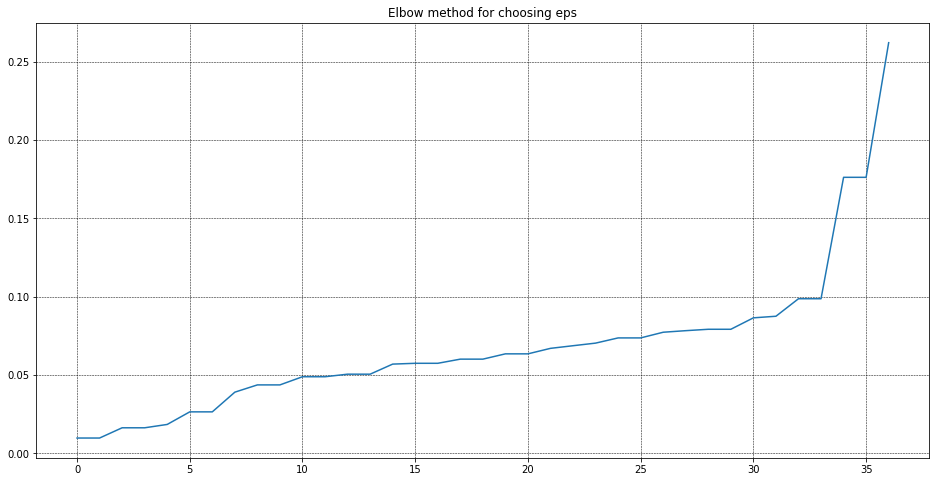

In [6]:
from sklearn.neighbors import NearestNeighbors
# min_samples
n = 4

# Calculate avg. distance between each point in the data set
neighbours = NearestNeighbors(n_neighbors=n)
neighbors_fit = neighbours.fit(df_escalado)
distances, indices = neighbors_fit.kneighbors(df_escalado)
distances = np.sort(distances[:,1], axis=0) #To obtain the distance of the sorted distances

# Plot
plt.figure(figsize=(16,8))
plt.title("Elbow method for choosing eps")
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.plot(distances)

### Expand the image
* The limit of x axis --> 110 and 140
* The limit of y axis --> 0 and 10000

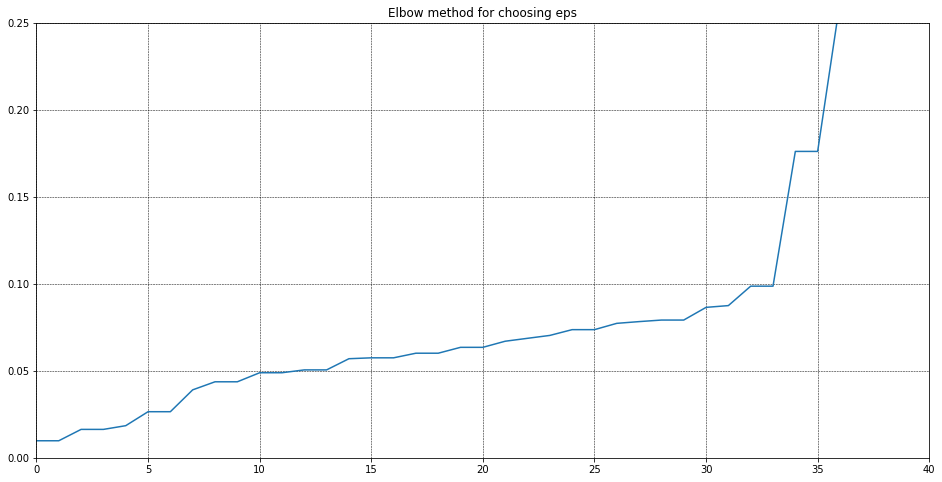

In [7]:
# Calculate avg. distance between each point in the data set
neighbours = NearestNeighbors(n_neighbors=n)
neighbors_fit = neighbours.fit(df_escalado)
distances, indices = neighbors_fit.kneighbors(df_escalado)
distances = np.sort(distances[:,1], axis=0) #To obtain the distance of the sorted distances

# Plot
plt.figure(figsize=(16,8))
plt.title("Elbow method for choosing eps")
plt.ylim(0, 0.25)
plt.xlim(0, 40)
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.plot(distances)

### Determine the epsilon
* eps = 0.05
* eps = 0.2

C:\Users\alvar\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\alvar\AppData\Local\Temp\ipykernel_26300\2567294018.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ap_filter['Cluster'] = cluster


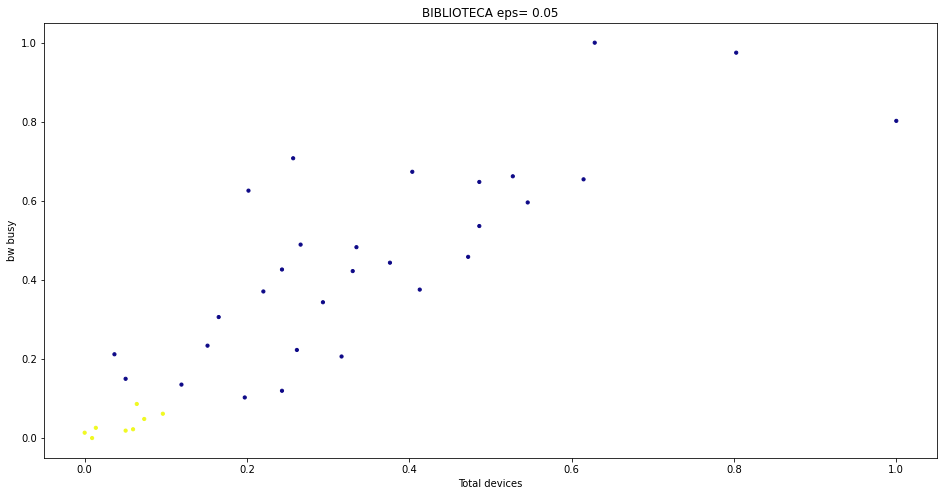

In [8]:
# 1st try with eps = 0.05
# Normalize
min_max_scaler = preprocessing.MinMaxScaler()
df_escalado = min_max_scaler.fit_transform(df_ap_filter)
df_escalado = pd.DataFrame(df_escalado)
df_escalado = df_escalado.rename(columns= {0 : 'bw_busy', 1: 'total_devices'})

# Epsilon 
e = 0.05

# DBSCAN
dbscan = DBSCAN(eps= e, min_samples= n)
cluster = dbscan.fit_predict(df_escalado)

# Add to dataFrame
df_ap_filter['Cluster'] = cluster

# Asign x and y
x = df_escalado['total_devices'].values # total_devices
y = df_escalado['bw_busy'].values # bw_busy

# Plot the clusters
plt.figure(figsize=(16,8))
plt.title("BIBLIOTECA eps= "+str(e))
plt.scatter(x, y, c = cluster, cmap= "plasma", s=10) # plotting the clusters 
plt.xlabel("Total devices") # X-axis label
plt.ylabel("bw busy") # Y-axis label
plt.show() # showing the plot


### Count of cluster

In [9]:
copy = pd.DataFrame()
copy['bw_busy']=df_ap_filter['suma_de_troughput'].values
copy['total_devices']=df_ap_filter['cuenta_de_ip_address'].values
copy['label'] = cluster
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,cantidad
label,
-1,29
0,8


C:\Users\alvar\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\alvar\AppData\Local\Temp\ipykernel_26300\1938616086.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ap_filter['Cluster'] = cluster


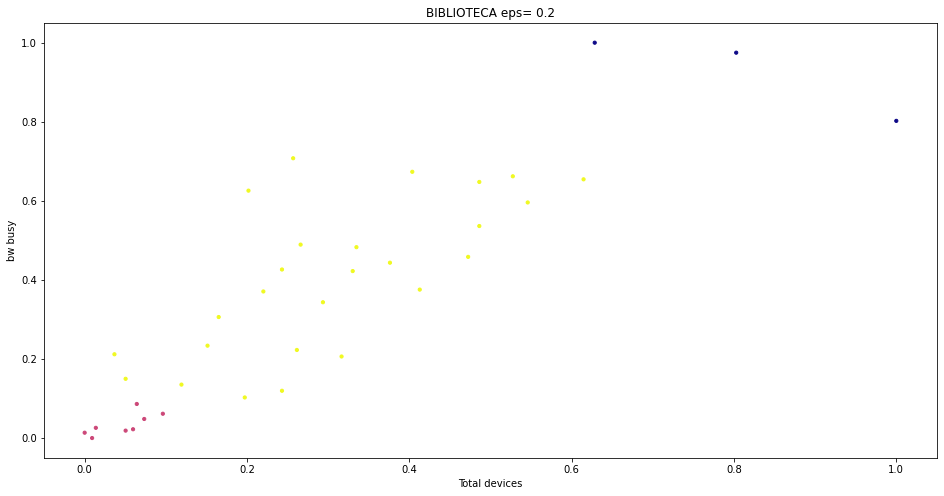

In [10]:
# 2nd try with eps = 0.2
# Normalize
min_max_scaler = preprocessing.MinMaxScaler()
df_escalado = min_max_scaler.fit_transform(df_ap_filter)
df_escalado = pd.DataFrame(df_escalado)
df_escalado = df_escalado.rename(columns= {0 : 'bw_busy', 1: 'total_devices'})

# Epsilon 
e = 0.2

# DBSCAN
dbscan = DBSCAN(eps= e, min_samples= n)
cluster = dbscan.fit_predict(df_escalado)

# Add to dataFrame
df_ap_filter['Cluster'] = cluster

# Asign x and y
x = df_escalado['total_devices'].values # total_devices
y = df_escalado['bw_busy'].values # bw_busy

# Plot the clusters
plt.figure(figsize=(16,8))
plt.title("BIBLIOTECA eps= "+str(e))
plt.scatter(x, y, c = cluster, cmap= "plasma", s=10) # plotting the clusters
plt.xlabel("Total devices") # X-axis label
plt.ylabel("bw busy") # Y-axis label
plt.show() # showing the plot

### Count of cluster

In [11]:
copy = pd.DataFrame()
copy['bw_busy']=df_ap_filter['suma_de_troughput'].values
copy['total_devices']=df_ap_filter['cuenta_de_ip_address'].values
copy['label'] = cluster
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,cantidad
label,
-1,3
0,8
1,26
